# Discovering Stable Periodic Frequent patterns in Big Data Using SPPECLAT Algorithm

In this tutorial, we will discuss the first approach to find Stable Periodic Frequent patterns in big data using SPPECLAT algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover Stable Periodic Frequent patterns using a single minimum support value

***

## <a id='basicApproach'>Basic approach: Executing SPPECLAT on a single dataset at a particular minimum support value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the SPPECLAT algorithm

In [1]:
from PAMI.stablePeriodicFrequentPattern.basic import SPPEclat as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'temporal_T10I4D100K.csv'

minimumSupportCount = 100  #Users can also specify this constraint between 0 to 1.
maxmunPeriodCount = 5000
maxLaValue = 1000

seperator = '\t'       

#### Step 3: Execute the SPPECLAT algorithm

In [3]:
obj = alg.SPPEclat(inputFile, minimumSupportCount, maxmunPeriodCount, maxLaValue, seperator)    #initialize
obj.startMine()            #Start the mining process

Stable Periodic Frequent patterns were generated successfully using SPPECLAT algorithm 


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='stablePeriodicFrequentPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
stablePeriodicFrequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(stablePeriodicFrequentPatternsDF)))

Total No of patterns: 26974


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 431.0436360836029


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 2210578432
Memory (USS): 2171834368


# Advanced Tutorial on Implementing SPPECLAT Algorithm

In this tutorial, we will discuss the second approach to find Stable Periodic Frequent patterns in big data using SPPECLAT algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover Stable Periodic Frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the Stable Periodic Frequent (SPPECLAT) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the SPPECLAT algorithm and pandas data frame

In [1]:
from PAMI.stablePeriodicFrequentPattern.basic import SPPEclat as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'temporal_T10I4D100K.csv'
seperator = '\t'

maxmunPeriodCount = 5000
minimumSupportCountList = [100, 150, 200, 250, 300]
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]
maxLaValue = 1000

result = pd.DataFrame(columns=['algorithm', 'minSup', 'maxPer', 'maxLa', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of PFECLAT algorithm

#### Step 3: Execute the SPPECLAT algorithm using a for loop

In [3]:
algorithm = 'SPPEclat'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.SPPEclat('temporal_T10I4D100K.csv', minSup=minSupCount,maxPer=maxmunPeriodCount, maxLa=maxLaValue,  sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount,maxmunPeriodCount, maxLaValue, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Stable Periodic Frequent patterns were generated successfully using SPPECLAT algorithm 
Stable Periodic Frequent patterns were generated successfully using SPPECLAT algorithm 
Stable Periodic Frequent patterns were generated successfully using SPPECLAT algorithm 
Stable Periodic Frequent patterns were generated successfully using SPPECLAT algorithm 
Stable Periodic Frequent patterns were generated successfully using SPPECLAT algorithm 


In [4]:
print(result)

  algorithm  minSup  maxPer  maxLa  patterns     runtime      memory
0  SPPEclat     100    5000   1000     26974  429.144334  2211295232
1  SPPEclat     150    5000   1000     19122  315.146705  1740992512
2  SPPEclat     200    5000   1000     13255  229.619283  1211293696
3  SPPEclat     250    5000   1000      7703  155.261853   830865408
4  SPPEclat     300    5000   1000      4552  112.985877   669536256


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

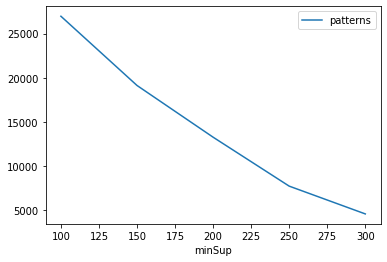

Graph for No Of Patterns is successfully generated!


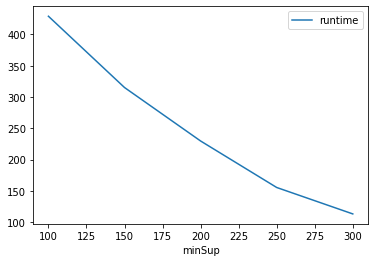

Graph for Runtime taken is successfully generated!


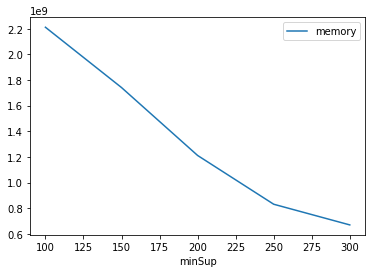

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
